# Problem Statement

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The data-sets are made available to public for the purpose of health data analysis. The data-set related to mortality, health factors for various countries have been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.  


What to solve for :
The data-set aims to answer two key questions - 

If under-five deaths are impacted by Salary Group, Status and infant deaths ?

Is mortality affected by various predictors as per this dataset? If yes, to what extent each of the predictors impact mortality? 

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_excel("Industry_Session_Regression.xlsx")  

### EDA

In [3]:
# Check top few records to get a feel of the data structure
df.head()

Status  Adult_Mortality  Infant_Deaths  Alcohol  \
0  Developing            263.0             62     0.01   
1  Developing            271.0             64     0.01   
2  Developing            268.0             66     0.01   
3  Developing            272.0             69     0.01   
4  Developing            275.0             71     0.01   

   Percentage_Expenditure  Hepatitis_B  Measles   BMI  UnderFiveDeaths  Polio  \
0               71.279624         65.0     1154  19.1               83    6.0   
1               73.523582         62.0      492  18.6               86   58.0   
2               73.219243         64.0      430  18.1               89   62.0   
3               78.184215         67.0     2787  17.6               93   67.0   
4                7.097109         68.0     3013  17.2               97   68.0   

   Total_Expenditure  Diphtheria  HIV_AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  33736494.0   
1               8.18        62.0       0.1  612.696514    327582.0   
2               8.13        64.0       0.1  631.744976  31731688.0   
3               8.52        67.0       0.1  669.959000   3696958.0   
4               7.87        68.0       0.1   63.537231   2978599.0   

   Thinness_1_19_Years  Thinness_5_9_Years  Income  Schooling  Mortality  
0                 17.2                17.3   0.479       10.1       65.0  
1                 17.5                17.5   0.476       10.0       59.9  
2                 17.7                17.7   0.470        9.9       59.9  
3                 17.9                18.0   0.463        9.8       59.5  
4                 18.2                18.2   0.454        9.5       59.2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Status                  2938 non-null   object 
 1   Adult_Mortality         2928 non-null   float64
 2   Infant_Deaths           2938 non-null   int64  
 3   Alcohol                 2744 non-null   float64
 4   Percentage_Expenditure  2938 non-null   float64
 5   Hepatitis_B             2385 non-null   float64
 6   Measles                 2938 non-null   int64  
 7   BMI                     2904 non-null   float64
 8   UnderFiveDeaths         2938 non-null   int64  
 9   Polio                   2919 non-null   float64
 10  Total_Expenditure       2712 non-null   float64
 11  Diphtheria              2919 non-null   float64
 12  HIV_AIDS                2938 non-null   float64
 13  GDP                     2490 non-null   float64
 14  Population              2286 non-null   

In [5]:
df.describe(include="all")

Status  Adult_Mortality  Infant_Deaths      Alcohol  \
count         2938      2928.000000    2938.000000  2744.000000   
unique           2              NaN            NaN          NaN   
top     Developing              NaN            NaN          NaN   
freq          2426              NaN            NaN          NaN   
mean           NaN       164.796448      30.303948     4.602861   
std            NaN       124.292079     117.926501     4.052413   
min            NaN         1.000000       0.000000     0.010000   
25%            NaN        74.000000       0.000000     0.877500   
50%            NaN       144.000000       3.000000     3.755000   
75%            NaN       228.000000      22.000000     7.702500   
max            NaN       723.000000    1800.000000    17.870000   

        Percentage_Expenditure  Hepatitis_B        Measles          BMI  \
count              2938.000000  2385.000000    2938.000000  2904.000000   
unique                     NaN          NaN            NaN          NaN   
top                        NaN          NaN            NaN          NaN   
freq                       NaN          NaN            NaN          NaN   
mean                738.251295    80.940461    2419.592240    38.321247   
std                1987.914858    25.070016   11467.272489    20.044034   
min                   0.000000     1.000000       0.000000     1.000000   
25%                   4.685343    77.000000       0.000000    19.300000   
50%                  64.912906    92.000000      17.000000    43.500000   
75%                 441.534144    97.000000     360.250000    56.200000   
max               19479.911610    99.000000  212183.000000    87.300000   

        UnderFiveDeaths        Polio  Total_Expenditure   Diphtheria  \
count       2938.000000  2919.000000         2712.00000  2919.000000   
unique              NaN          NaN                NaN          NaN   
top                 NaN          NaN                NaN          NaN   
freq                NaN          NaN                NaN          NaN   
mean          42.035739    82.550188            5.93819    82.324084   
std          160.445548    23.428046            2.49832    23.716912   
min            0.000000     3.000000            0.37000     2.000000   
25%            0.000000    78.000000            4.26000    78.000000   
50%            4.000000    93.000000            5.75500    93.000000   
75%           28.000000    97.000000            7.49250    97.000000   
max         2500.000000    99.000000           17.60000    99.000000   

           HIV_AIDS            GDP    Population  Thinness_1_19_Years  \
count   2938.000000    2490.000000  2.286000e+03          2904.000000   
unique          NaN            NaN           NaN                  NaN   
top             NaN            NaN           NaN                  NaN   
freq            NaN            NaN           NaN                  NaN   
mean       1.742103    7483.158469  1.275338e+07             4.839704   
std        5.077785   14270.169342  6.101210e+07             4.420195   
min        0.100000       1.681350  3.400000e+01             0.100000   
25%        0.100000     463.935626  1.957932e+05             1.600000   
50%        0.100000    1766.947595  1.386542e+06             3.300000   
75%        0.800000    5910.806335  7.420359e+06             7.200000   
max       50.600000  119172.741800  1.293859e+09            27.700000   

        Thinness_5_9_Years       Income    Schooling    Mortality  
count          2904.000000  2771.000000  2775.000000  2928.000000  
unique                 NaN          NaN          NaN          NaN  
top                    NaN          NaN          NaN          NaN  
freq                   NaN          NaN          NaN          NaN  
mean              4.870317     0.627551    11.992793    69.224932  
std               4.508882     0.210904     3.358920     9.523867  
min               0.100000     0.000000     0.000000    36.300000  
25%               1.

### unique values for categorical variables

In [6]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

STATUS :  2
Developed      512
Developing    2426
Name: Status, dtype: int64




### Converting categorical to dummy variables

In [7]:
df = pd.get_dummies(df, columns=['Status'],drop_first=True)

In [8]:
df.head(2)

Adult_Mortality  Infant_Deaths  Alcohol  Percentage_Expenditure  \
0            263.0             62     0.01               71.279624   
1            271.0             64     0.01               73.523582   

   Hepatitis_B  Measles   BMI  UnderFiveDeaths  Polio  Total_Expenditure  \
0         65.0     1154  19.1               83    6.0               8.16   
1         62.0      492  18.6               86   58.0               8.18   

   Diphtheria  HIV_AIDS         GDP  Population  Thinness_1_19_Years  \
0        65.0       0.1  584.259210  33736494.0                 17.2   
1        62.0       0.1  612.696514    327582.0                 17.5   

   Thinness_5_9_Years  Income  Schooling  Mortality  Status_Developing  
0                17.3   0.479       10.1       65.0                  1  
1                17.5   0.476       10.0       59.9                  1

In [9]:
# Are there any missing values ?
df.isnull().sum()

Adult_Mortality            10
Infant_Deaths               0
Alcohol                   194
Percentage_Expenditure      0
Hepatitis_B               553
Measles                     0
BMI                        34
UnderFiveDeaths             0
Polio                      19
Total_Expenditure         226
Diphtheria                 19
HIV_AIDS                    0
GDP                       448
Population                652
Thinness_1_19_Years        34
Thinness_5_9_Years         34
Income                    167
Schooling                 163
Mortality                  10
Status_Developing           0
dtype: int64

### Imputing missing values

In [10]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()        

Adult_Mortality           0
Infant_Deaths             0
Alcohol                   0
Percentage_Expenditure    0
Hepatitis_B               0
Measles                   0
BMI                       0
UnderFiveDeaths           0
Polio                     0
Total_Expenditure         0
Diphtheria                0
HIV_AIDS                  0
GDP                       0
Population                0
Thinness_1_19_Years       0
Thinness_5_9_Years        0
Income                    0
Schooling                 0
Mortality                 0
Status_Developing         0
dtype: int64

In [11]:
df.head()

Adult_Mortality  Infant_Deaths  Alcohol  Percentage_Expenditure  \
0            263.0             62     0.01               71.279624   
1            271.0             64     0.01               73.523582   
2            268.0             66     0.01               73.219243   
3            272.0             69     0.01               78.184215   
4            275.0             71     0.01                7.097109   

   Hepatitis_B  Measles   BMI  UnderFiveDeaths  Polio  Total_Expenditure  \
0         65.0     1154  19.1               83    6.0               8.16   
1         62.0      492  18.6               86   58.0               8.18   
2         64.0      430  18.1               89   62.0               8.13   
3         67.0     2787  17.6               93   67.0               8.52   
4         68.0     3013  17.2               97   68.0               7.87   

   Diphtheria  HIV_AIDS         GDP  Population  Thinness_1_19_Years  \
0        65.0       0.1  584.259210  33736494.0                 17.2   
1        62.0       0.1  612.696514    327582.0                 17.5   
2        64.0       0.1  631.744976  31731688.0                 17.7   
3        67.0       0.1  669.959000   3696958.0                 17.9   
4        68.0       0.1   63.537231   2978599.0                 18.2   

   Thinness_5_9_Years  Income  Schooling  Mortality  Status_Developing  
0                17.3   0.479       10.1       65.0                  1  
1                17.5   0.476       10.0       59.9                  1  
2                17.7   0.470        9.9       59.9                  1  
3                18.0   0.463        9.8       59.5                  1  
4                18.2   0.454        9.5       59.2                  1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Adult_Mortality         2938 non-null   float64
 1   Infant_Deaths           2938 non-null   int64  
 2   Alcohol                 2938 non-null   float64
 3   Percentage_Expenditure  2938 non-null   float64
 4   Hepatitis_B             2938 non-null   float64
 5   Measles                 2938 non-null   int64  
 6   BMI                     2938 non-null   float64
 7   UnderFiveDeaths         2938 non-null   int64  
 8   Polio                   2938 non-null   float64
 9   Total_Expenditure       2938 non-null   float64
 10  Diphtheria              2938 non-null   float64
 11  HIV_AIDS                2938 non-null   float64
 12  GDP                     2938 non-null   float64
 13  Population              2938 non-null   float64
 14  Thinness_1_19_Years     2938 non-null   

In [13]:
df.describe()

Adult_Mortality  Infant_Deaths      Alcohol  Percentage_Expenditure  \
count      2938.000000    2938.000000  2938.000000             2938.000000   
mean        164.796448      30.303948     4.602861              738.251295   
std         124.080302     117.926501     3.916288             1987.914858   
min           1.000000       0.000000     0.010000                0.000000   
25%          74.000000       0.000000     1.092500                4.685343   
50%         144.000000       3.000000     4.160000               64.912906   
75%         227.000000      22.000000     7.390000              441.534144   
max         723.000000    1800.000000    17.870000            19479.911610   

       Hepatitis_B        Measles          BMI  UnderFiveDeaths        Polio  \
count  2938.000000    2938.000000  2938.000000      2938.000000  2938.000000   
mean     80.940461    2419.592240    38.321247        42.035739    82.550188   
std      22.586855   11467.272489    19.927677       160.445548    23.352143   
min       1.000000       0.000000     1.000000         0.000000     3.000000   
25%      80.940461       0.000000    19.400000         0.000000    78.000000   
50%      87.000000      17.000000    43.000000         4.000000    93.000000   
75%      96.000000     360.250000    56.100000        28.000000    97.000000   
max      99.000000  212183.000000    87.300000      2500.000000    99.000000   

       Total_Expenditure   Diphtheria     HIV_AIDS            GDP  \
count        2938.000000  2938.000000  2938.000000    2938.000000   
mean            5.938190    82.324084     1.742103    7483.158469   
std             2.400274    23.640073     5.077785   13136.800417   
min             0.370000     2.000000     0.100000       1.681350   
25%             4.370000    78.000000     0.100000     580.486996   
50%             5.938190    93.000000     0.100000    3116.561755   
75%             7.330000    97.000000     0.800000    7483.158469   
max            17.600000    99.000000    50.600000  119172.741800   

         Population  Thinness_1_19_Years  Thinness_5_9_Years       Income  \
count  2.938000e+03          2938.000000         2938.000000  2938.000000   
mean   1.275338e+07             4.839704            4.870317     0.627551   
std    5.381546e+07             4.394535            4.482708     0.204820   
min    3.400000e+01             0.100000            0.100000     0.000000   
25%    4.189172e+05             1.600000            1.600000     0.504250   
50%    3.675929e+06             3.400000            3.400000     0.662000   
75%    1.275338e+07             7.100000            7.200000     0.772000   
max    1.293859e+09            27.700000           28.600000     0.948000   

         Schooling    Mortality  Status_Developing  
count  2938.000000  2938.000000        2938.000000  
mean     11.992793    69.224932           0.825732  
std       3.264381     9.507640           0.379405  
min       0.000000    36.300000           0.000000  
25%      10.300000    63.200000           1.000000  
50%      12.100000    72.000000           1.000000  
75%      14.100000    75.600000           1.000000  
max      20.700000    89.000000           1.000000

### Checking for duplicates

In [14]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


### Correlation Plot

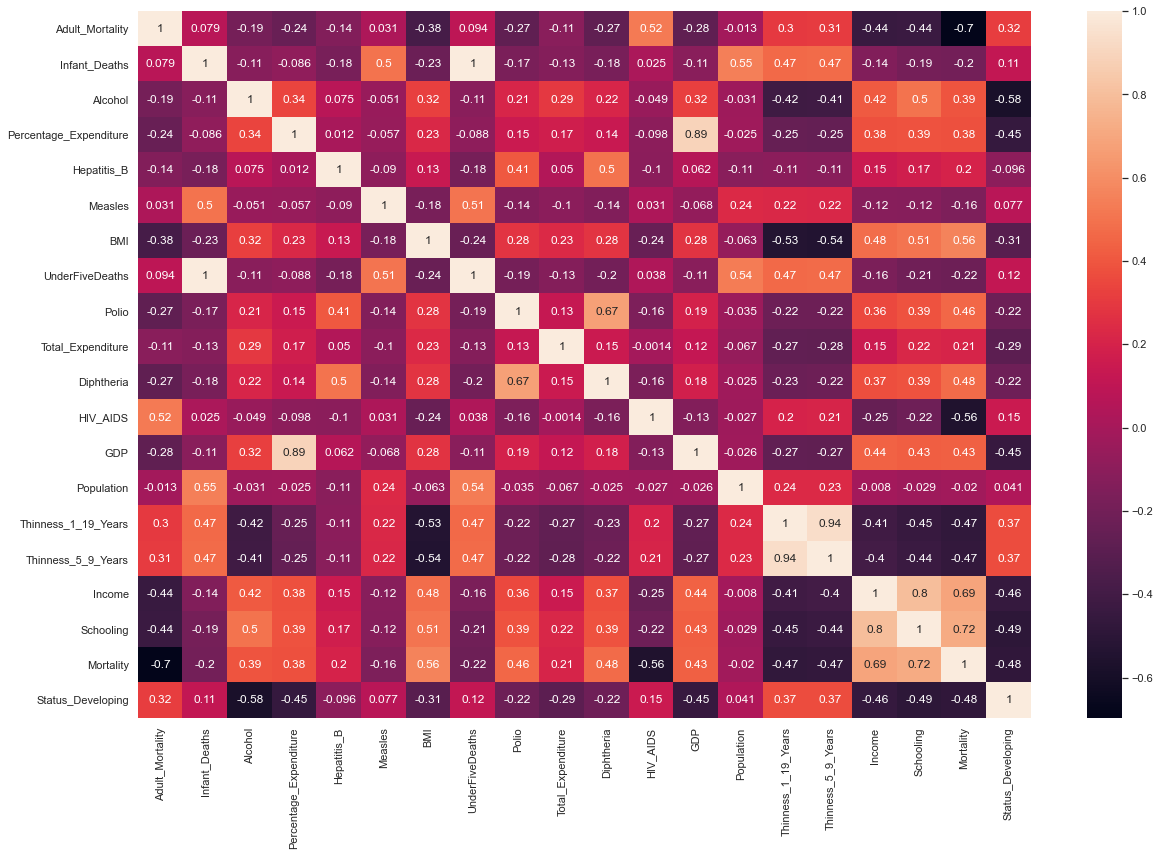

In [15]:
plt.figure(figsize=(20,13))
sns.set(font_scale=1)
sns.heatmap(df.iloc[:,:].corr(),annot=True)
plt.show()

**The variable 'Infant_Deaths', 'UnderFiveDeaths','Percentage_Expenditure', 'GDP' etc. are having correlation with each other.**


In [16]:
df.head()

Adult_Mortality  Infant_Deaths  Alcohol  Percentage_Expenditure  \
0            263.0             62     0.01               71.279624   
1            271.0             64     0.01               73.523582   
2            268.0             66     0.01               73.219243   
3            272.0             69     0.01               78.184215   
4            275.0             71     0.01                7.097109   

   Hepatitis_B  Measles   BMI  UnderFiveDeaths  Polio  Total_Expenditure  \
0         65.0     1154  19.1               83    6.0               8.16   
1         62.0      492  18.6               86   58.0               8.18   
2         64.0      430  18.1               89   62.0               8.13   
3         67.0     2787  17.6               93   67.0               8.52   
4         68.0     3013  17.2               97   68.0               7.87   

   Diphtheria  HIV_AIDS         GDP  Population  Thinness_1_19_Years  \
0        65.0       0.1  584.259210  33736494.0                 17.2   
1        62.0       0.1  612.696514    327582.0                 17.5   
2        64.0       0.1  631.744976  31731688.0                 17.7   
3        67.0       0.1  669.959000   3696958.0                 17.9   
4        68.0       0.1   63.537231   2978599.0                 18.2   

   Thinness_5_9_Years  Income  Schooling  Mortality  Status_Developing  
0                17.3   0.479       10.1       65.0                  1  
1                17.5   0.476       10.0       59.9                  1  
2                17.7   0.470        9.9       59.9                  1  
3                18.0   0.463        9.8       59.5                  1  
4                18.2   0.454        9.5       59.2                  1

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Adult_Mortality         2938 non-null   float64
 1   Infant_Deaths           2938 non-null   int64  
 2   Alcohol                 2938 non-null   float64
 3   Percentage_Expenditure  2938 non-null   float64
 4   Hepatitis_B             2938 non-null   float64
 5   Measles                 2938 non-null   int64  
 6   BMI                     2938 non-null   float64
 7   UnderFiveDeaths         2938 non-null   int64  
 8   Polio                   2938 non-null   float64
 9   Total_Expenditure       2938 non-null   float64
 10  Diphtheria              2938 non-null   float64
 11  HIV_AIDS                2938 non-null   float64
 12  GDP                     2938 non-null   float64
 13  Population              2938 non-null   float64
 14  Thinness_1_19_Years     2938 non-null   

### Outlier Checks

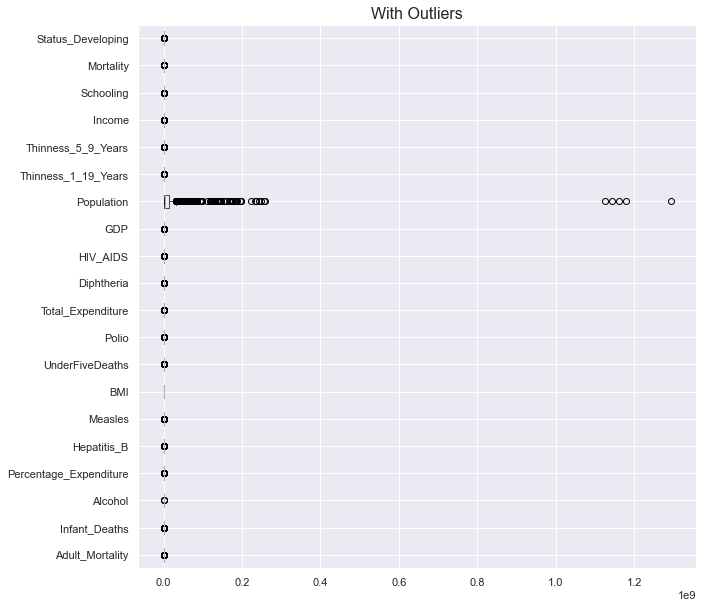

In [18]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='unit')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
df1=df

In [21]:
for column in df1[cont].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

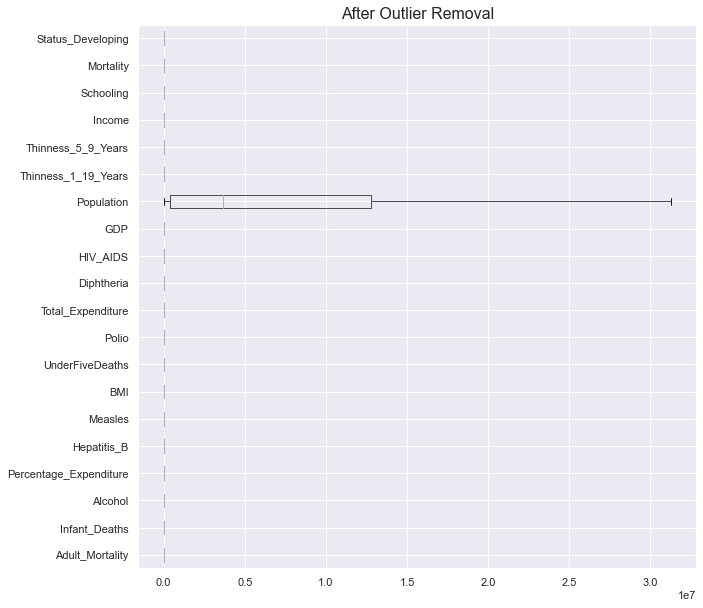

In [22]:
plt.figure(figsize=(10,10))
df1[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

C:\Users\Rachit\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


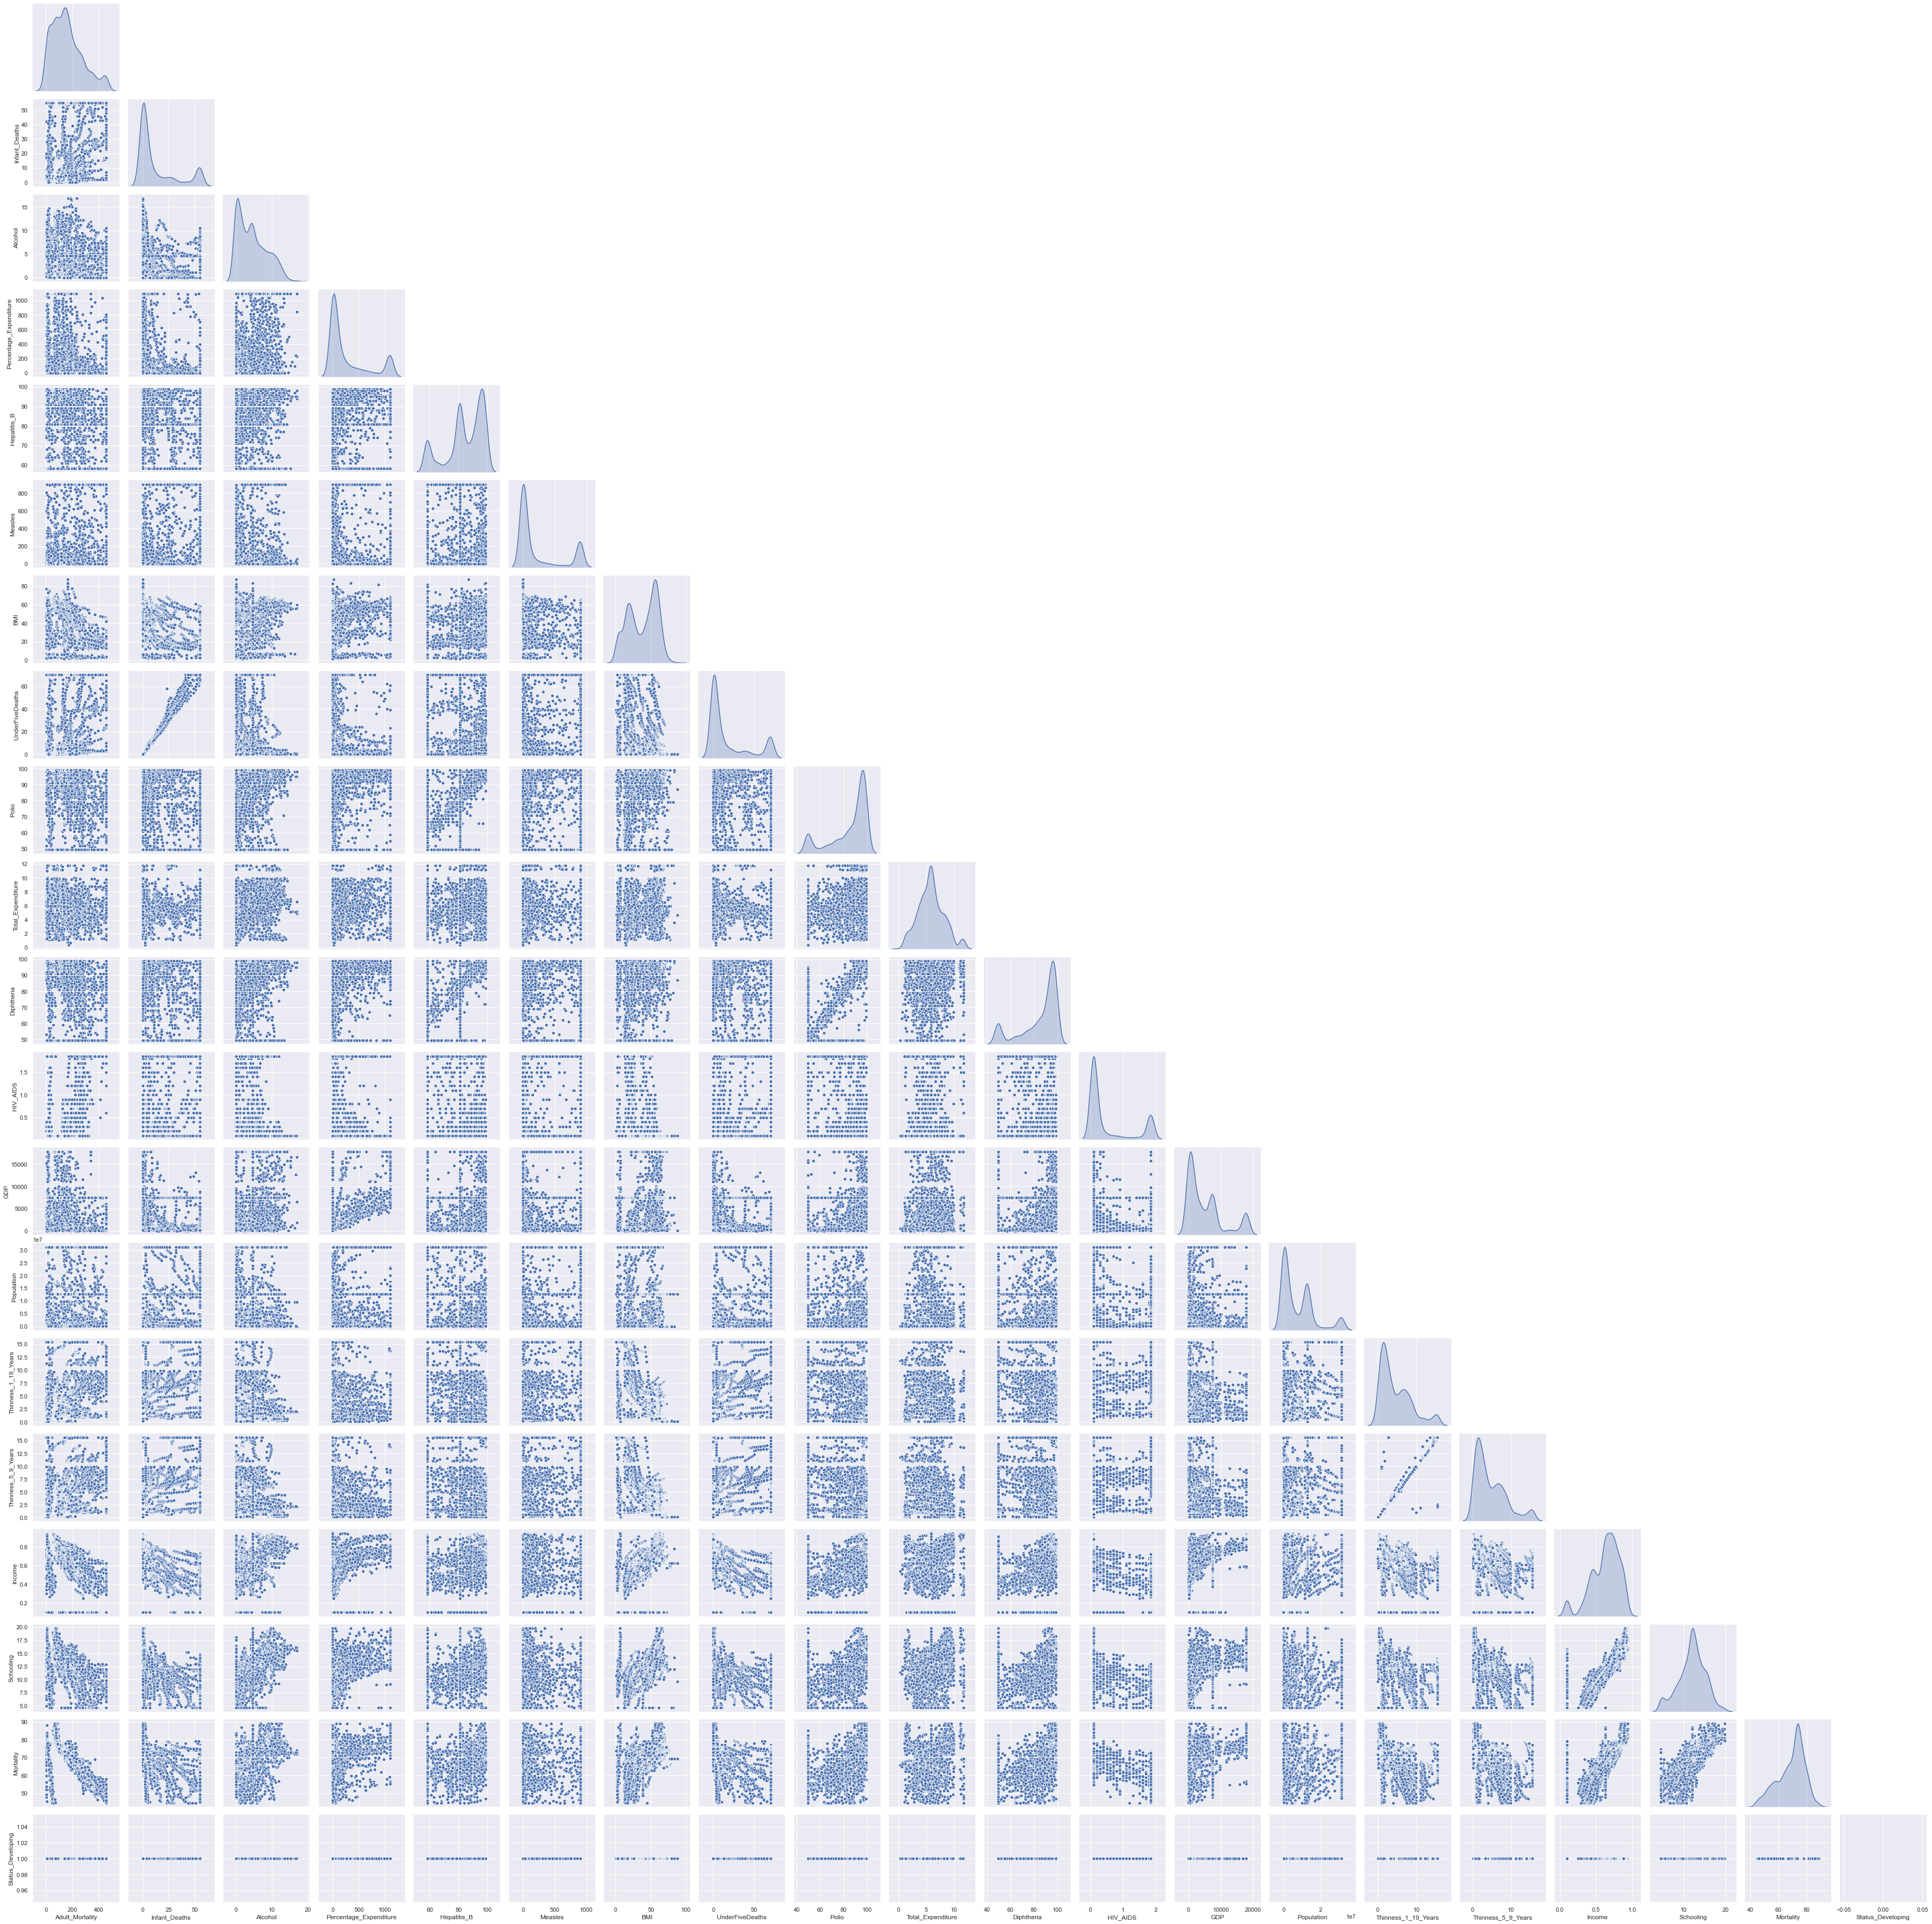

In [23]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde',corner=True)  
plt.show()

### Linear Regression using statsmodels

In [24]:
df.columns[0:20]

Index(['Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure',
       'Hepatitis_B', 'Measles', 'BMI', 'UnderFiveDeaths', 'Polio',
       'Total_Expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population',
       'Thinness_1_19_Years', 'Thinness_5_9_Years', 'Income', 'Schooling',
       'Mortality', 'Status_Developing'],
      dtype='object')

In [25]:
expr1= 'Mortality ~Adult_Mortality+Infant_Deaths+Alcohol+Percentage_Expenditure+Hepatitis_B+Measles+BMI+UnderFiveDeaths+Polio+Total_Expenditure+Diphtheria+HIV_AIDS+GDP+Population+Thinness_1_19_Years+Thinness_5_9_Years+Income+Schooling+Status_Developing'

In [26]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr1, data = df).fit()
lm1.params

Intercept                 3.133525e+01
Adult_Mortality          -1.660814e-02
Infant_Deaths             2.480031e-01
Alcohol                   7.175588e-02
Percentage_Expenditure    1.484623e-03
Hepatitis_B              -4.155960e-02
Measles                  -7.639533e-05
BMI                      -1.660902e-04
UnderFiveDeaths          -2.396282e-01
Polio                     2.553888e-02
Total_Expenditure         1.009918e-01
Diphtheria                5.871432e-02
HIV_AIDS                 -4.829241e+00
GDP                       3.664461e-05
Population                2.971832e-08
Thinness_1_19_Years       2.195310e-02
Thinness_5_9_Years       -1.590440e-01
Income                    7.926625e+00
Schooling                 2.491059e-01
Status_Developing         3.133525e+01
dtype: float64

In [27]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              Mortality   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     923.2
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:29:37   Log-Likelihood:                -7983.6
No. Observations:                2938   AIC:                         1.601e+04
Df Residuals:                    2919   BIC:                         1.612e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 31

In [28]:
# Calculate MSE
mse1 = np.mean((lm1.predict(df.drop('Mortality',axis=1))-df['Mortality'])**2)
mse1

13.421641949240597

In [29]:
#Root Mean Squared Error - RMSE
np.sqrt(mse1).round(2)

3.66

In [30]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= expr1, data = df1).fit()
lm2.params

Intercept                 3.133525e+01
Adult_Mortality          -1.660814e-02
Infant_Deaths             2.480031e-01
Alcohol                   7.175588e-02
Percentage_Expenditure    1.484623e-03
Hepatitis_B              -4.155960e-02
Measles                  -7.639533e-05
BMI                      -1.660902e-04
UnderFiveDeaths          -2.396282e-01
Polio                     2.553888e-02
Total_Expenditure         1.009918e-01
Diphtheria                5.871432e-02
HIV_AIDS                 -4.829241e+00
GDP                       3.664461e-05
Population                2.971832e-08
Thinness_1_19_Years       2.195310e-02
Thinness_5_9_Years       -1.590440e-01
Income                    7.926625e+00
Schooling                 2.491059e-01
Status_Developing         3.133525e+01
dtype: float64

In [31]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              Mortality   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     923.2
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:29:38   Log-Likelihood:                -7983.6
No. Observations:                2938   AIC:                         1.601e+04
Df Residuals:                    2919   BIC:                         1.612e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 31

In [32]:
# Calculate MSE
mse2 = np.mean((lm2.predict(df1.drop('Mortality',axis=1))-df1['Mortality'])**2)
mse2

13.421641949240597

In [33]:
#Root Mean Squared Error - RMSE
np.sqrt(mse2).round(2)

3.66

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [34]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(31.34) * Intercept + (-0.02) * Adult_Mortality + (0.25) * Infant_Deaths + (0.07) * Alcohol + (0.0) * Percentage_Expenditure + (-0.04) * Hepatitis_B + (-0.0) * Measles + (-0.0) * BMI + (-0.24) * UnderFiveDeaths + (0.03) * Polio + (0.1) * Total_Expenditure + (0.06) * Diphtheria + (-4.83) * HIV_AIDS + (0.0) * GDP + (0.0) * Population + (0.02) * Thinness_1_19_Years + (-0.16) * Thinness_5_9_Years + (7.93) * Income + (0.25) * Schooling + (31.34) * Status_Developing + 

 # Conclusion

The final Linear Regression equation is  
  
 
<b>(31.34) * Intercept + (-0.02) * Adult_Mortality + (0.25) * Infant_Deaths + (0.07) * Alcohol + (0.0) * Percentage_Expenditure + (-0.04) * Hepatitis_B + (-0.0) * Measles + (-0.0) * BMI + (-0.24) * UnderFiveDeaths + (0.03) * Polio + (0.1) * Total_Expenditure + (0.06) * Diphtheria + (-4.83) * HIV_AIDS + (0.0) * GDP + (0.0) * Population + (0.02) * Thinness_1_19_Years + (-0.16) * Thinness_5_9_Years + (7.93) * Income + (0.25) * Schooling + (31.34) * Status_Developing + True</b>  
  
When Status_Developing increases by 1 unit, Mortality increases by 31.34 units, keeping all other predictors constant.  
similarly, when no. of Alcohol increases by 1 unit, Mortality increases by 0.07 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, Thinness_5_9_Years has its corresponding co-efficient as -0.16. This implies, when the Thinness_5_9_Years increases by 1 unit, the Mortality decreases by 0.16 units, keeping all other predictors constant.

